# Single Chart

## Spider Chart

In [1]:
# Example data (replace with your actual data)
# labels = ["Di aiuto", "Facile", "Efficiente", "Chiara", "Appassionante", "Interessante", "Originale", "Moderna"]
labels = ["Helpful", "Easy", "Efficient", "Clear", "Engaging", "Interesting", "Original", "Modern"]
user_scores = [
    [6, 7, 6, 5, 6, 5, 4, 6],  # User 1
    [5, 6, 5, 6, 4, 6, 5, 7],  # User 2
    [1, 6, 2, 7, 6, 6, 5, 6],  # User 3
    # Add remaining user responses...
]

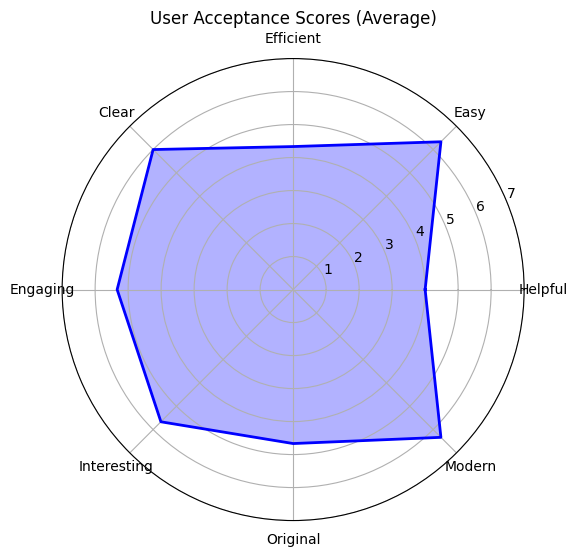

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Compute average scores for each dimension
user_scores = np.array(user_scores)
avg_scores = np.mean(user_scores, axis=0)

# Create the angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
avg_scores = np.concatenate((avg_scores, [avg_scores[0]]))  # Close the circle
angles += angles[:1]  # Close the circle

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, avg_scores, color='b', alpha=0.3)
ax.plot(angles, avg_scores, color='b', linewidth=2)

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Set y-ticks to integers from 1 to 7
ax.set_yticks(np.arange(1, 8, 1))
ax.set_yticklabels(map(str, range(1, 8)))

plt.title("User Acceptance Scores (Average)")
plt.show()


## Boxplot

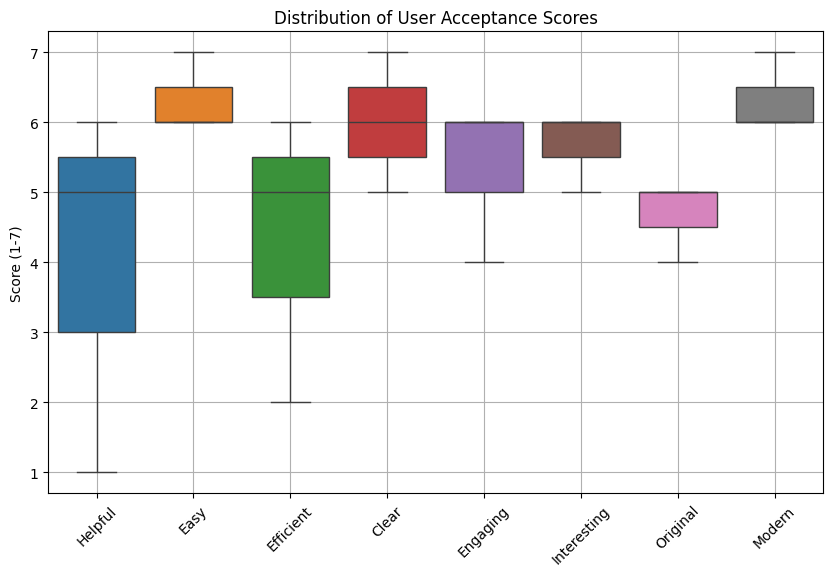

In [3]:
import seaborn as sns
import pandas as pd

# Convert user_scores into a DataFrame
df = pd.DataFrame(user_scores, columns=labels)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df) # Add a 'color=<your color>' to make everything of that colors

# Set y-ticks from 1 to 7 (integer values only)
plt.yticks(range(1, 8))

plt.title("Distribution of User Acceptance Scores")
plt.ylabel("Score (1-7)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Violin

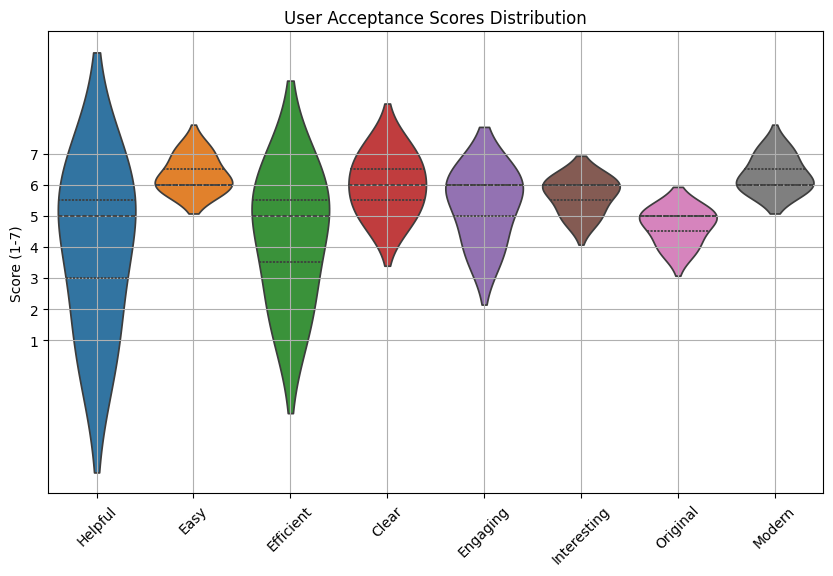

In [4]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, inner="quartile")

# Set y-ticks from 1 to 7 (integer values only)
plt.yticks(range(1, 8))

plt.title("User Acceptance Scores Distribution")
plt.ylabel("Score (1-7)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Double Chart

In [5]:
labels = ["Helpful", "Easy", "Efficient", "Clear", "Engaging", "Interesting", "Original", "Modern"]

# User scores for Virtual Reality (VR)
vr_user_scores = [
    [6, 7, 6, 5, 6, 5, 4, 6],  # User 1
    [5, 6, 5, 6, 5, 6, 5, 7],  # User 2
    [7, 6, 7, 7, 6, 6, 5, 6],  # User 3
    # Add remaining user responses...
]

# User scores for Augmented Reality (AR)
ar_user_scores = [
    [5, 6, 5, 4, 5, 6, 6, 7],  # User 1
    [6, 7, 6, 5, 6, 5, 7, 6],  # User 2
    [7, 7, 7, 6, 7, 7, 5, 6],  # User 3
    # Add remaining user responses...
]

## Spider Chart

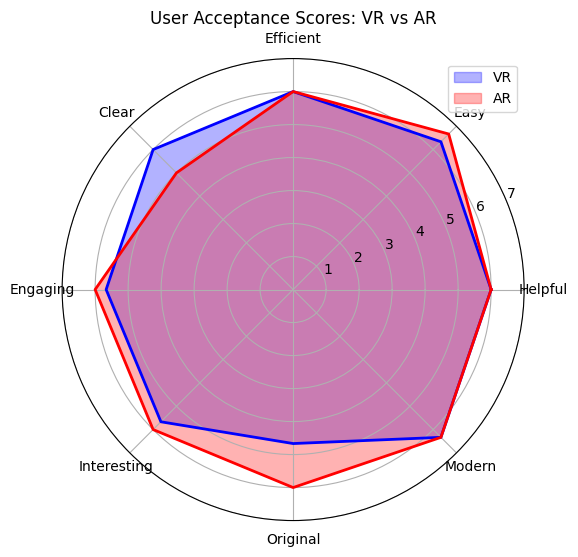

In [6]:
vr_user_scores = np.array(vr_user_scores)
ar_user_scores = np.array(ar_user_scores)

# Compute average scores
vr_avg_scores = np.mean(vr_user_scores, axis=0)
ar_avg_scores = np.mean(ar_user_scores, axis=0)

# Create angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
vr_avg_scores = np.concatenate((vr_avg_scores, [vr_avg_scores[0]]))  # Close the circle
ar_avg_scores = np.concatenate((ar_avg_scores, [ar_avg_scores[0]]))  # Close the circle
angles += angles[:1]  # Close the circle

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot VR scores
ax.fill(angles, vr_avg_scores, color='b', alpha=0.3, label="VR")
ax.plot(angles, vr_avg_scores, color='b', linewidth=2)

# Plot AR scores
ax.fill(angles, ar_avg_scores, color='r', alpha=0.3, label="AR")
ax.plot(angles, ar_avg_scores, color='r', linewidth=2)

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Set y-ticks from 1 to 7 (integer values only)
ax.set_yticks(np.arange(1, 8, 1))
ax.set_yticklabels(map(str, range(1, 8)))

plt.title("User Acceptance Scores: VR vs AR")
plt.legend()
plt.show()

## BoxPlots

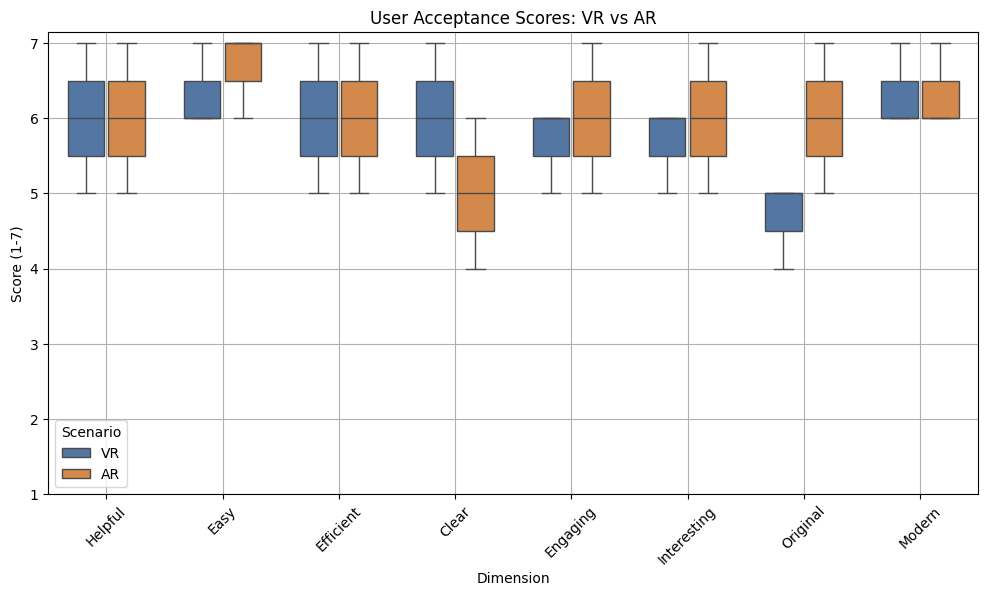

In [7]:
# Convert to DataFrame
df_vr = pd.DataFrame(vr_user_scores, columns=labels)
df_ar = pd.DataFrame(ar_user_scores, columns=labels)

# Add scenario labels
df_vr["Scenario"] = "VR"
df_ar["Scenario"] = "AR"

# Combine both datasets
df = pd.concat([df_vr, df_ar])

# Melt for easier plotting
df_melted = df.melt(id_vars=["Scenario"], var_name="Dimension", value_name="Score")

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Dimension", y="Score", hue="Scenario", data=df_melted, palette={"VR": "#4674af", "AR": "#ea8734"}, gap=0.1, width=0.7)

# Set y-ticks from 1 to 7
plt.yticks(range(1, 8))

plt.title("User Acceptance Scores: VR vs AR")
plt.xlabel("Dimension")
plt.ylabel("Score (1-7)")
plt.xticks(rotation=45)
plt.legend(title="Scenario")
plt.grid(True)
plt.show()

## Violin plot (Decisamente no)

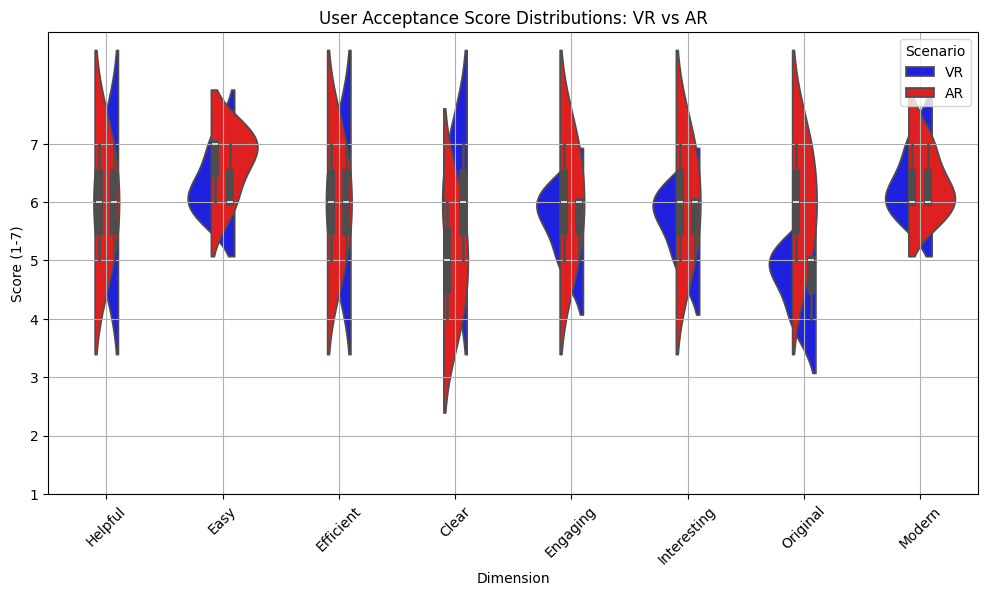

In [8]:
# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Dimension", y="Score", hue="Scenario", data=df_melted, split=True, palette={"VR": "blue", "AR": "red"}, width=.4, gap=-1)

# Set y-ticks from 1 to 7
plt.yticks(range(1, 8))

plt.title("User Acceptance Score Distributions: VR vs AR")
plt.xlabel("Dimension")
plt.ylabel("Score (1-7)")
plt.xticks(rotation=45)
plt.legend(title="Scenario")
plt.grid(True)
plt.show()
